## Student Performance Indicator

### 1) Problem Statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preaparation course. 

### 2) Import Data and Required Packages
#### 2.1 Importing Pandas, Numpy, Matplotlib, Seaborn and Warning Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#### 2.2 Import CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/stud.csv')

#### 2.3 Show top 5 records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### 2.4 Shape of the Dataset

In [4]:
df.shape

(1000, 8)

### 3) Data Checks to Perform
<ul>
  <li>Check Missing values</li>
  <li>Check Duplicates</li>
  <li>Check Data type</li>
  <li>Check number of unique values of each column</li>
  <li>Check statistics of dataset</li>
  <li>Check various categories present in the different categorical columns</li>
</ul>

#### 3.1 Check Missing values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

There are no missing values present in the dataset.

#### 3.2 Check Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

There are no duplicates present in the dataset.

#### 3.3 Check data types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


#### 3.4 Checking the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check statistics of data set

In [9]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Insites
<ul>
    <li>From the above description of numberic data, all means are very close to each other - between 66 to 69.17</li>
    <li>All standard deviations are also close - between 14.6 to 15.19</li>
    <li>While there is a minimum score 0 for math, 17 for reading and 10 for writing.</li>
</ul>

#### 3.6 Check various categories present in the different categorical columns

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O' ]
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O' ]

print(f"We have {len(numerical_features)} numerical features: {numerical_features}")
print(f"We have {len(categorical_features)} categorical features: {categorical_features}")

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
print("Categories in gender column:")
print(df['gender'].unique())

print("\nCategories in race ethnicity column:")
print(df['race_ethnicity'].unique())

print("\nCategories in parental level of education column:")
print(df['parental_level_of_education'].unique())

print("\nCategories in lunch column:")
print(df['lunch'].unique())

print("\nCategories in test preparation course column:")
print(df['test_preparation_course'].unique())

Categories in gender column:
['female' 'male']

Categories in race ethnicity column:
['group B' 'group C' 'group A' 'group D' 'group E']

Categories in parental level of education column:
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

Categories in lunch column:
['standard' 'free/reduced']

Categories in test preparation course column:
['none' 'completed']


#### 3.7 Adding columns for "Total Score" and "Average"

In [13]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df["total_score"] = df["math_score"]+df["reading_score"]+df["writing_score"]
df["average_score"] = df["total_score"]/3
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


#### 3.8 Finding number of students with max marks and min marks.

In [15]:
math_full = df[df["math_score"] == 100]["math_score"].count()
reading_full = df[df["reading_score"] == 100]["reading_score"].count()
writing_full = df[df["writing_score"] == 100]["writing_score"].count()

print(f"Number of students with full marks in Maths:{math_full}")
print(f"Number of students with full marks in Reading:{reading_full}")
print(f"Number of students with full marks in Writing:{writing_full}")


Number of students with full marks in Maths:7
Number of students with full marks in Reading:17
Number of students with full marks in Writing:14


In [16]:
math_less_20 = df[df["math_score"] <= 20]["math_score"].count()
reading_less_20 = df[df["reading_score"] <= 20]["reading_score"].count()
writing_less_20 = df[df["writing_score"] <= 20]["writing_score"].count()

print(f"Number of students with less than 20 marks in Maths:{math_less_20}")
print(f"Number of students with less than 20 marks in Reading:{reading_less_20}")
print(f"Number of students with less than 20 marks in Writing:{writing_less_20}")

Number of students with less than 20 marks in Maths:4
Number of students with less than 20 marks in Reading:1
Number of students with less than 20 marks in Writing:3


#### Insights
<ul>
    <li>From the above values we got to know that students performed worst in Maths.</li>
    <li>From the above values we got to know that students performed best in Reading.</li>
</ul>


### 4) Exploring Data(Visualization)

#### 4.1 Visualize average score distribution to make some conclusion.
<ul>
    <li>Histogram</li>
    <li>Kernal Distribution Function</li>
</ul>

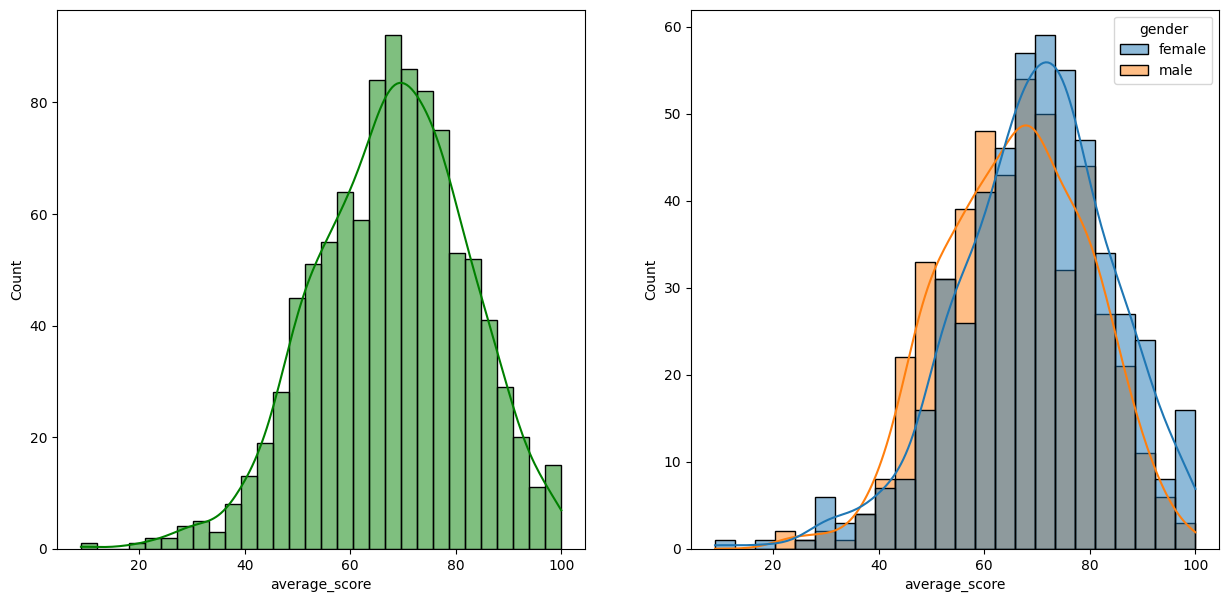

In [17]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

#### Insights
<ul>
    <li>Female students performed well when compared to male students.</li>
</ul>

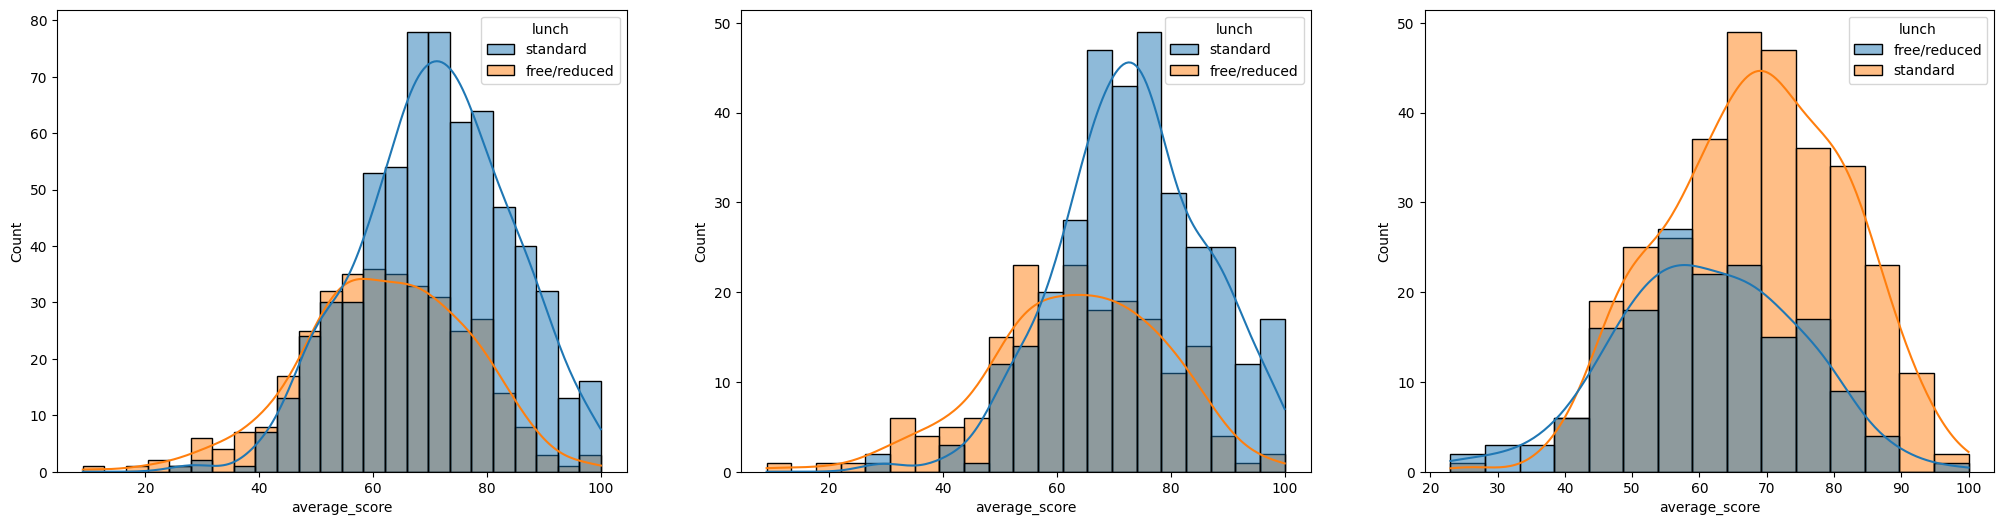

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

#### Insights
<ul>
    <li>Standard lunch helps perform well in exams irrespective to the gender.</li>
</ul>

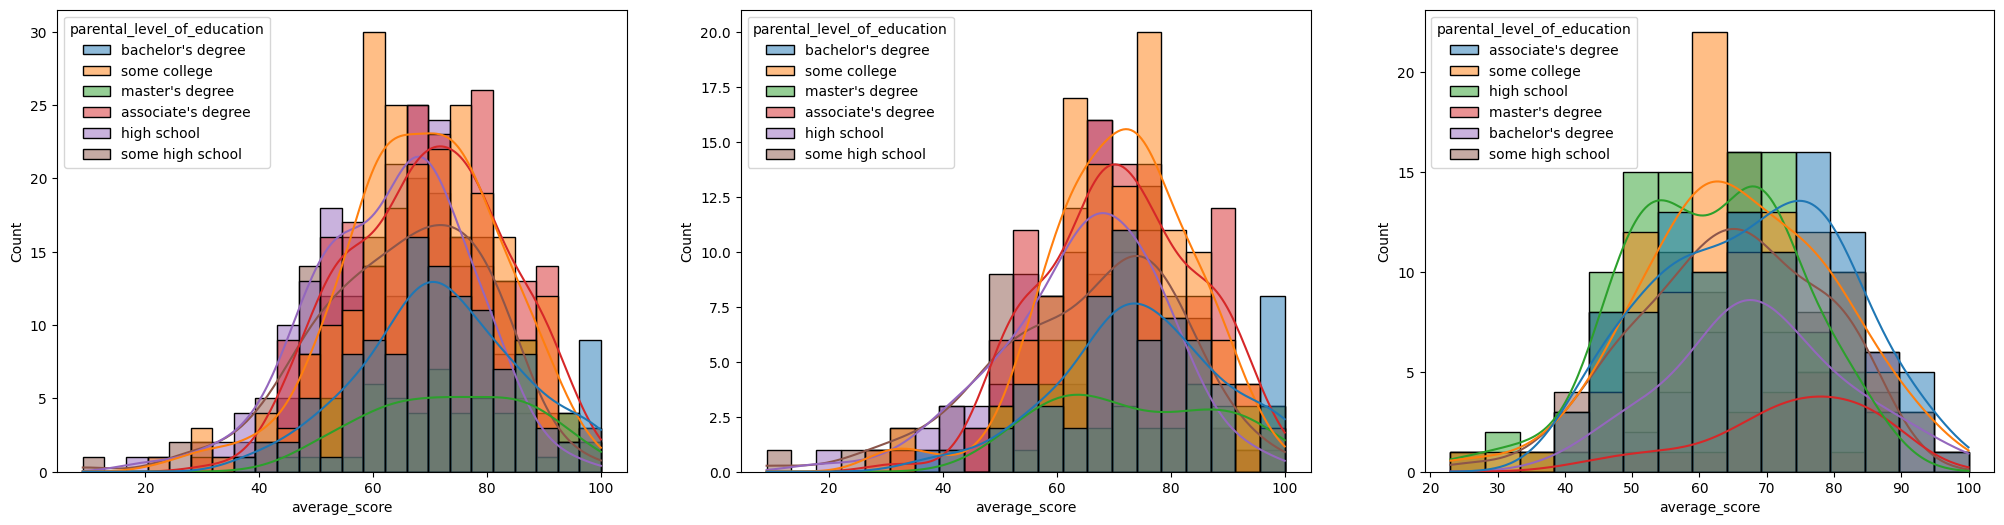

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='parental_level_of_education')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'], x='average_score', kde=True, hue='parental_level_of_education')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'], x='average_score', kde=True, hue='parental_level_of_education')
plt.show()

#### Insights
<ul>
    <li>In general parent's education don't help student perform well in exam.</li>
    <li>2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam.</li>
    <li>3rd plot we can see there is no effect of parent's education on female students.</li>
</ul>

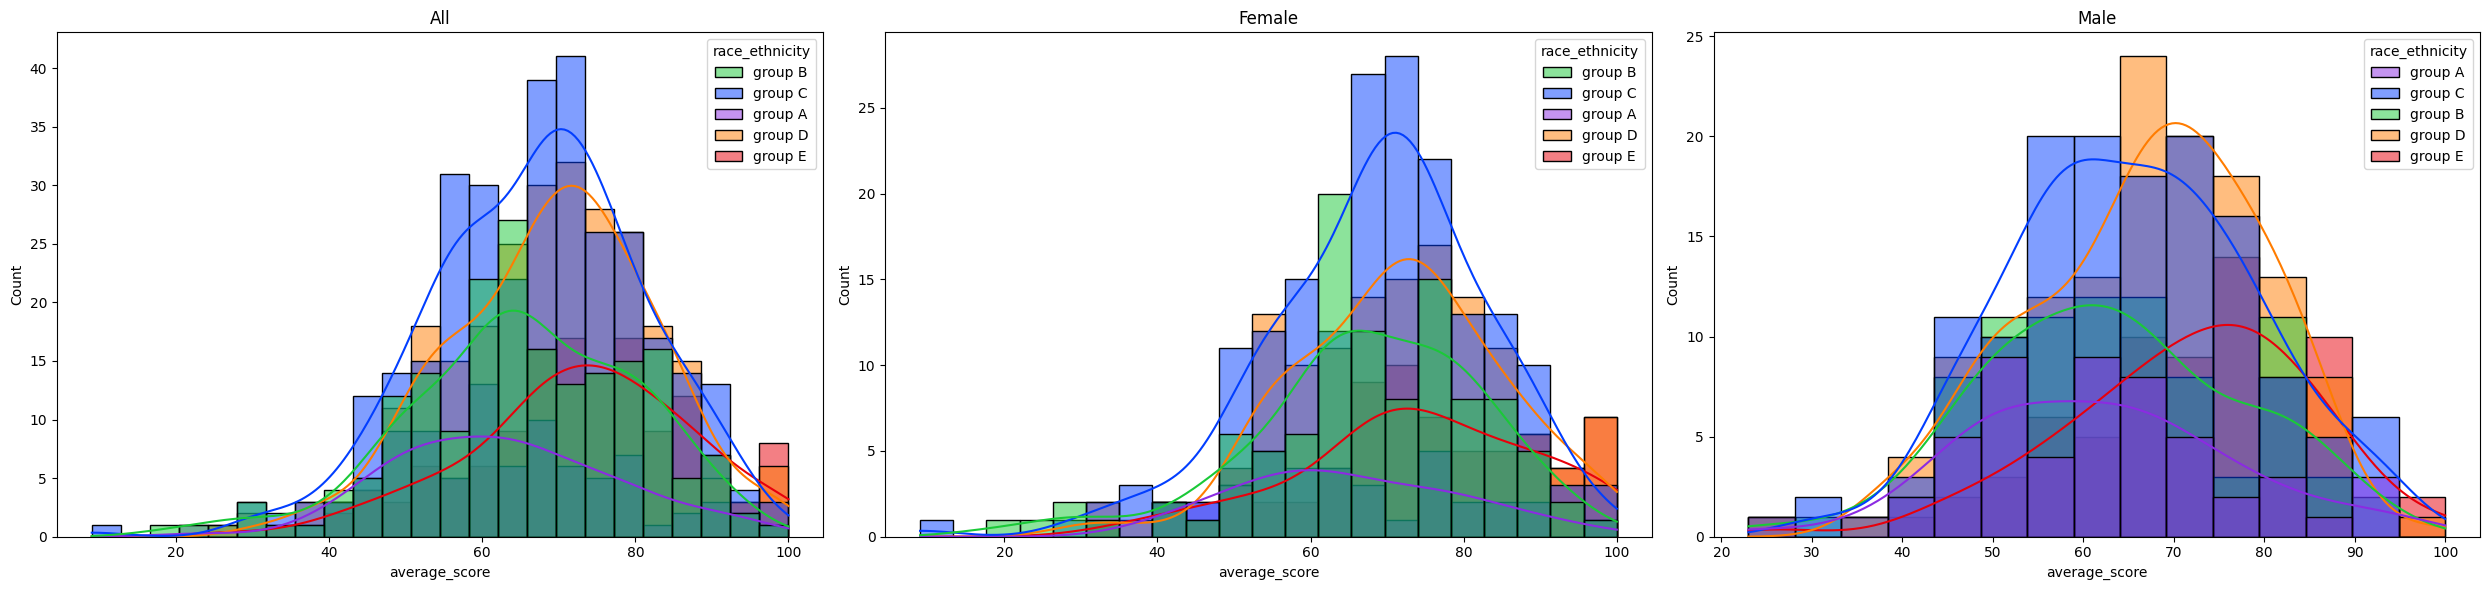

In [20]:
# Get race_ethnicity groups in value_counts order (or sort alphabetically)
race_groups = df['race_ethnicity'].value_counts().index.tolist()

# Assign consistent colors
colors = sns.color_palette('bright', n_colors=len(race_groups))
color_map = dict(zip(race_groups, colors))

# Map groups to colors using palette argument
custom_palette = color_map

# Plotting
plt.subplots(1, 3, figsize=(25, 6))

# --- All ---
plt.subplot(131)
sns.histplot(data=df, x='average_score', kde=True, hue='race_ethnicity', palette=custom_palette)
plt.title("All")

# --- Female ---
plt.subplot(132)
sns.histplot(
    data=df[df.gender == 'female'], x='average_score', kde=True, hue='race_ethnicity', palette=custom_palette)
plt.title("Female")

# --- Male ---
plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='average_score', kde=True, hue='race_ethnicity', palette=custom_palette)
plt.title("Male")

plt.tight_layout()
plt.show()


#### Insights
<ul>
    <li>Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female</li>
</ul>

#### 4.2 Maximum score of students in all three subjects

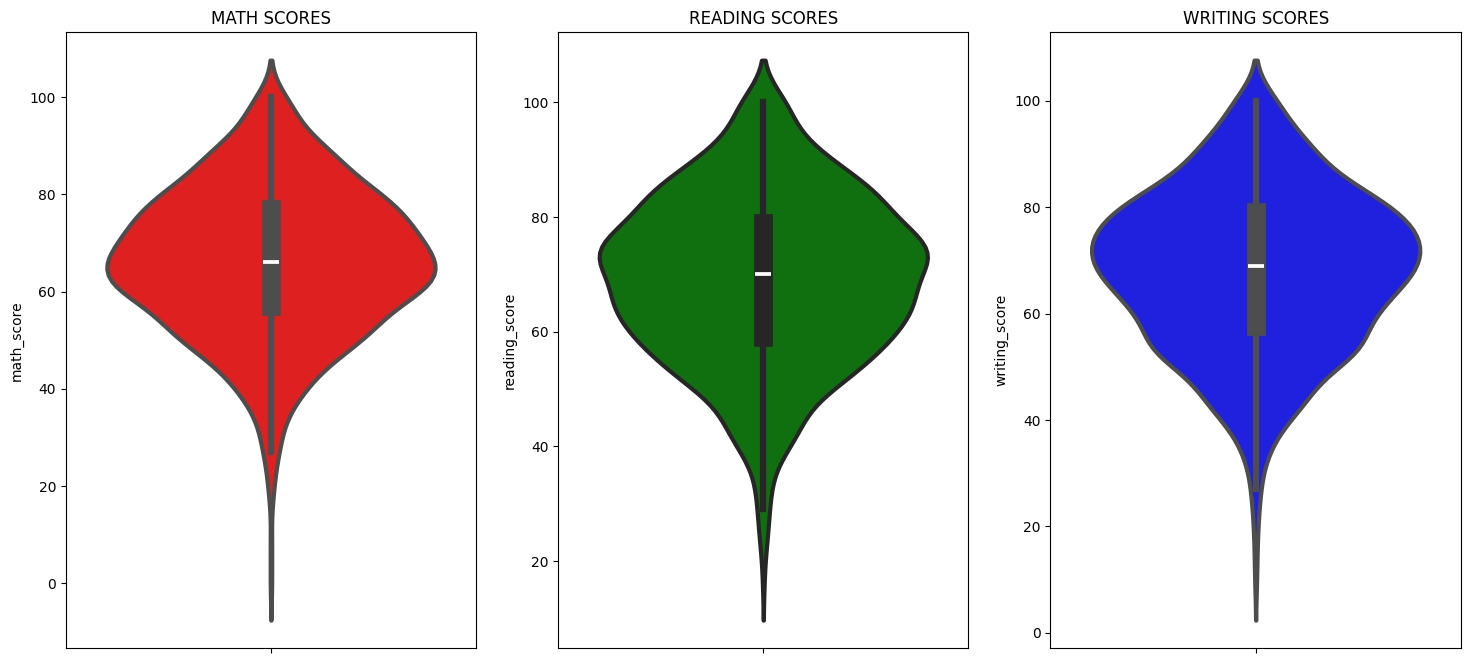

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,3,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1,3,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()


#### Insights
<ul>
    <li>From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80</li>
</ul>

#### 4.3 Mutivariate analysis using pyplot

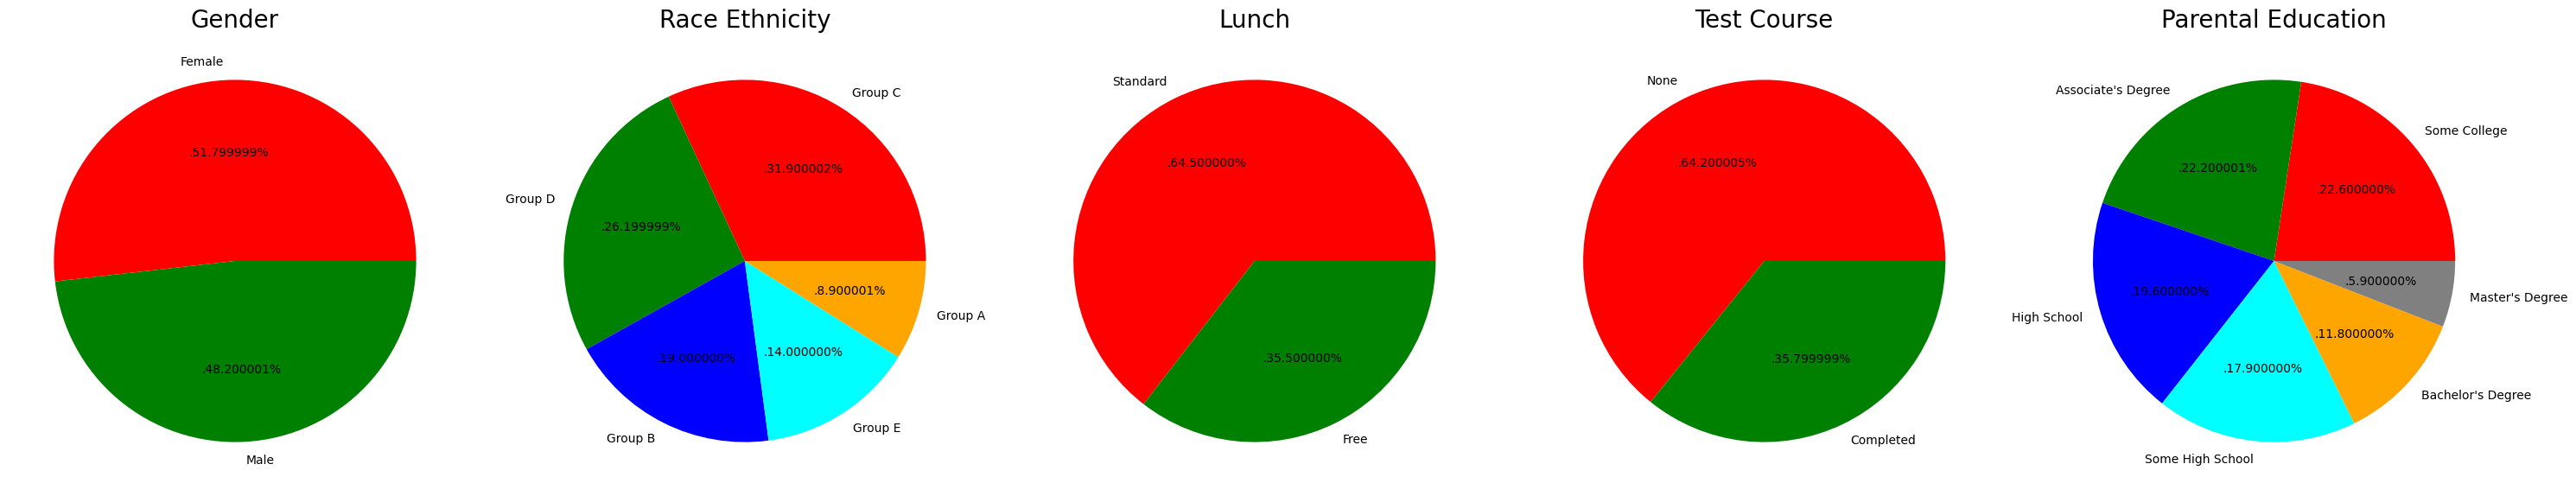

In [22]:
plt.rcParams['figure.figsize'] = (30,12)

plt.subplot(1,5,1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']

plt.pie(size,colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'
color = ['red', 'green', 'blue', 'cyan', 'orange']

plt.pie(size, colors= color, labels = labels, autopct= '.%2f%%')
plt.title('Race Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']


plt.pie(size, colors = color, labels = labels, autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color, labels = labels, autopct= '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1,5,5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red','green','blue','cyan','orange','grey']

plt.pie(size, colors = color, labels= labels, autopct= '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

#### Insights
<ul>
    <li>Male and Female students count is almost equal.</li>
    <li>More number of students are present in Group C.</li>
    <li>Students who are having standard lunch are more compared to free lunch.</li>
    <li>Count of students who have not enrolled in any test prearation course is greater.</li>
    <li>Count of students whose parental education in "Some College" is highest followed by "Associate's Degree".</li>
</ul>

#### 4.4 Feature Wise Visualization
##### 4.4.1 Gender Column
<ul>
    <li>How is distribution of Gender?</li>
    <li>Is gender has any impact on student's performance?</li>
</ul>

##### Univariate Analysis (How is distribution of Gender?)

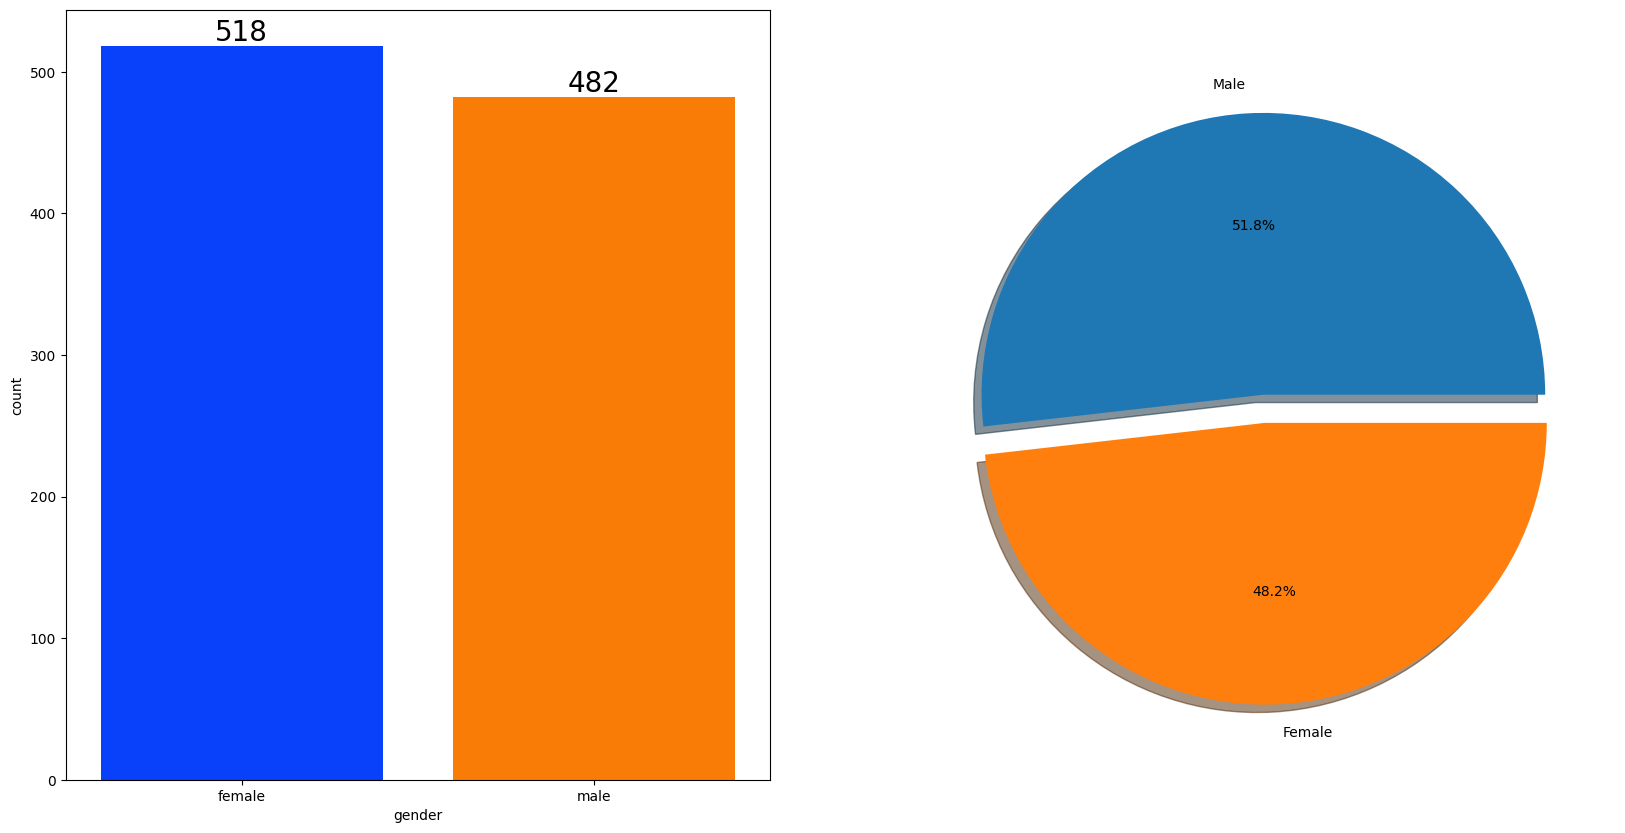

In [23]:
f,ax = plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette = 'bright', ax = ax[0], saturation = 0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color = 'black', size = 20)

plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True)
plt.show()

#### Insights
<ul>
    <li>Gender has balanced data with 518(48%) female students and 482(52%) male students </li>
</ul>

#### Bivariate Analysis (Is gender has any impact on student's performance?)

In [24]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [25]:
gender_group = df.groupby('gender')
gender_group

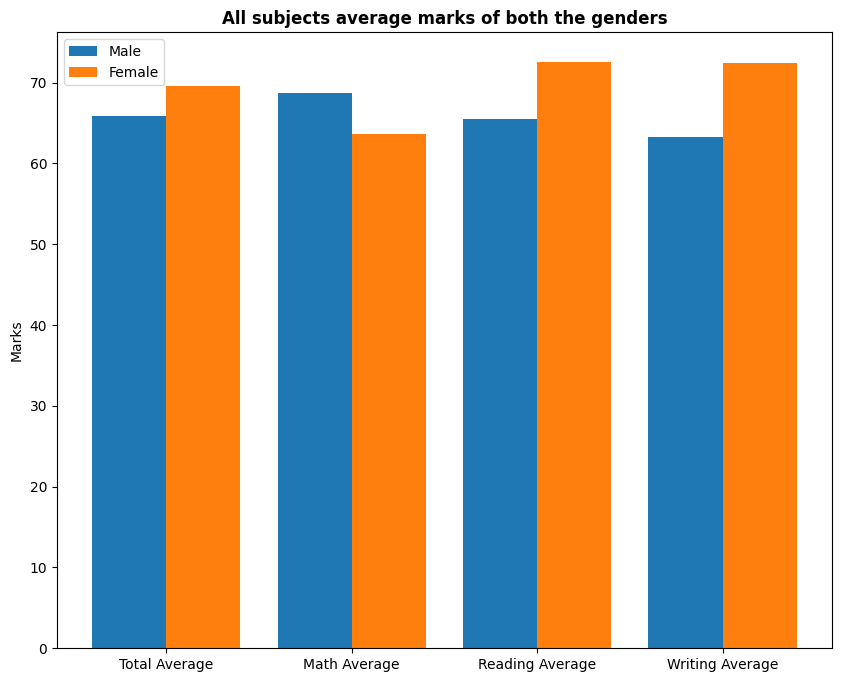

In [26]:
plt.figure(figsize=(10, 8))

X = ['Total Average','Math Average','Reading Average','Writing Average']


female_scores = [gender_group['average_score'].mean()[0], gender_group['math_score'].mean()[0],gender_group['reading_score'].mean()[0], gender_group['writing_score'].mean()[0]]
male_scores = [gender_group['average_score'].mean()[1], gender_group['math_score'].mean()[1],gender_group['reading_score'].mean()[1], gender_group['writing_score'].mean()[1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("All subjects average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

#### Insites

<ul>
    <li>On an average female have better overall score than male.</li>
    <li>Female have scored higher in reading and writing.</li>
    <li>Where as male have scored higher in maths.</li>
</ul>

##### 4.4.2 Race Ethnicity column
<ul>
    <li>How is group wise distribution?</li>
    <li>Is Race Ethnicity has any impact on student's performance?</li>
</ul>

##### Univariate Analysis (How is group wise distribution?)

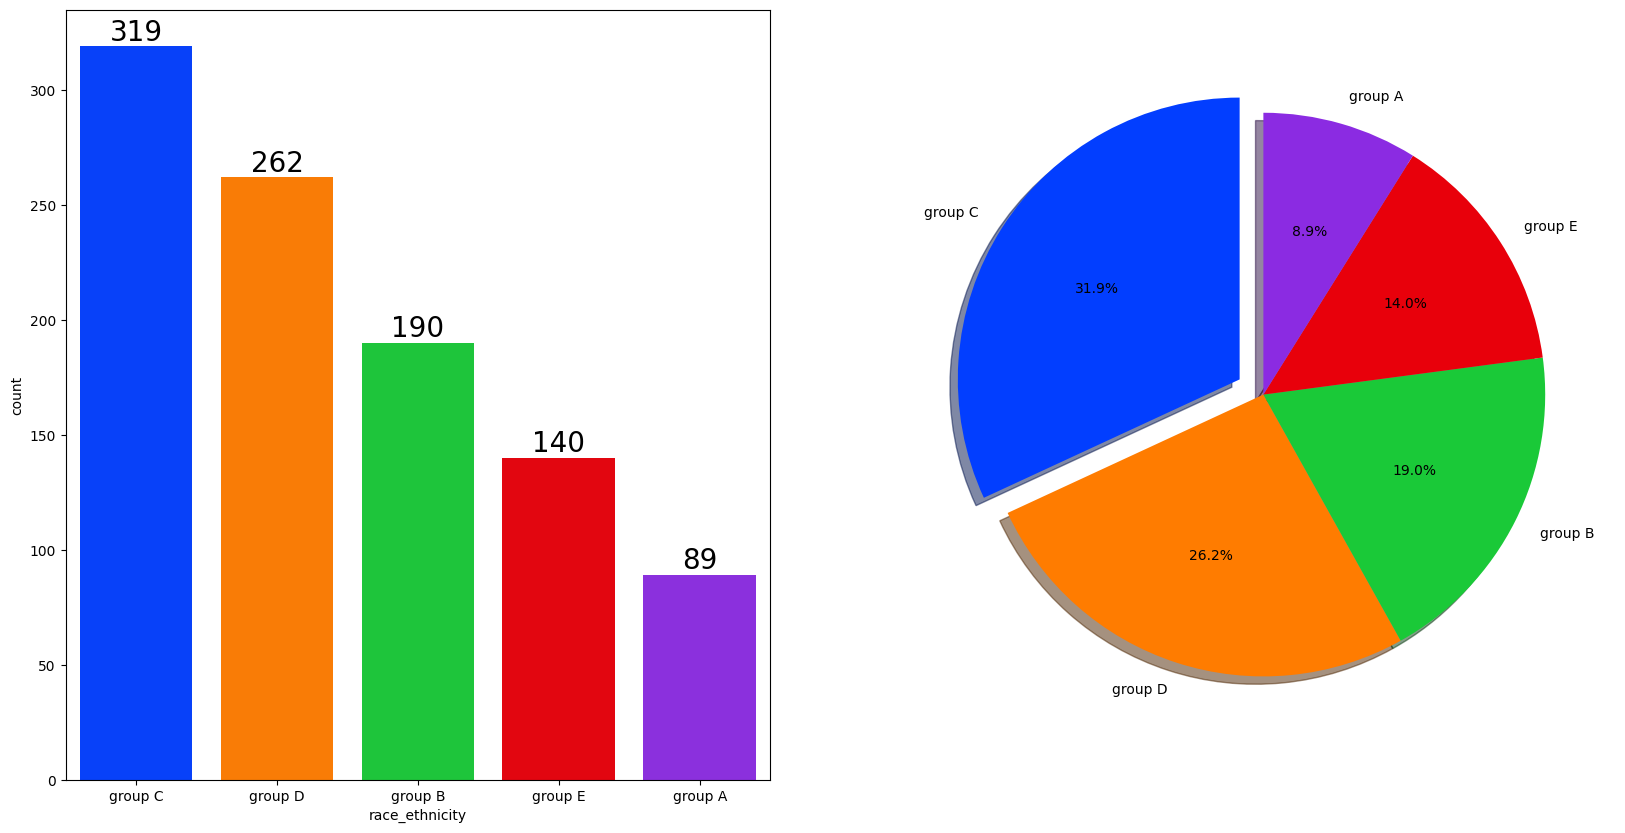

In [27]:
# Get unique groups in fixed order (e.g., value_counts() order)
group_counts = df['race_ethnicity'].value_counts()
groups = group_counts.index.tolist()

# Define a color palette (can also use other palettes like 'Set2', 'tab10' etc.)
colors = sns.color_palette('bright', n_colors=len(groups))

# Map each group to a color
color_map = dict(zip(groups, colors))

# --- Bar Plot ---
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Use same color order in bar plot
sns.countplot(x=df['race_ethnicity'], order=groups, palette=color_map, ax=ax[0], saturation=0.95)

# Add bar labels
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# --- Pie Chart ---
# Pie chart values (same order as bar chart)
values = group_counts.values
labels = groups
pie_colors = [color_map[group] for group in groups]

# Create explode list: only explode the first slice
explode = [0.1] + [0] * (len(groups) - 1)

# Plot pie chart with consistent colors
ax[1].pie(values, labels=labels, colors=pie_colors, explode=explode,
          autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()


#### Insights
<ul>
    <li>Most of the student belonging from group C and group D.</li>
    <li>Lowest number of students belong to group A.</li>
</ul>

##### Bivariate Analysis (Is Race_ethnicity has any impact on student's performance?)

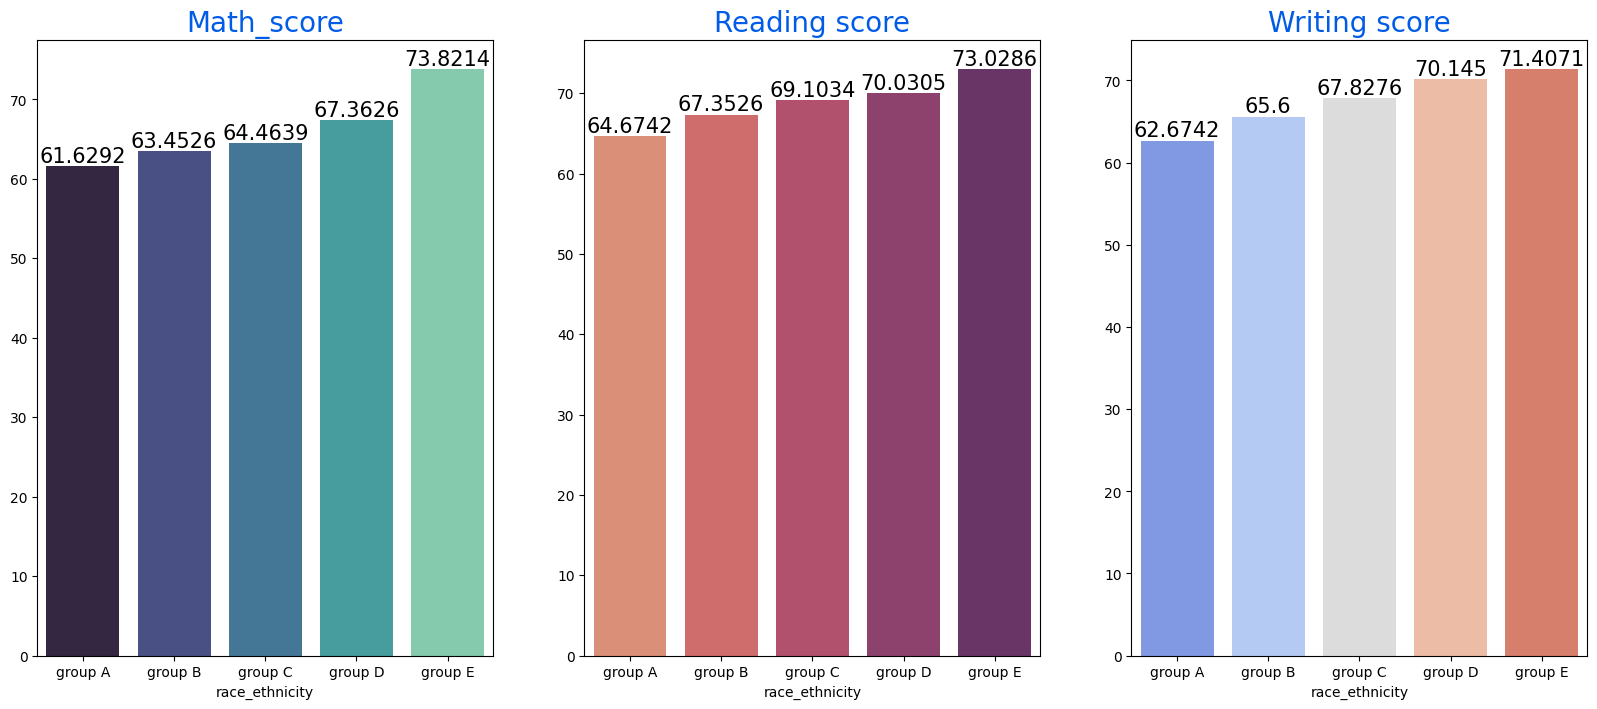

In [28]:
race_ethnicity_group=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=race_ethnicity_group['math_score'].mean().index,y=race_ethnicity_group['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=race_ethnicity_group['reading_score'].mean().index,y=race_ethnicity_group['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=race_ethnicity_group['writing_score'].mean().index,y=race_ethnicity_group['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

#### Insights
<ul>
    <li>Group E students have scored the highest marks.</li>
    <li>Group A students have scored the lowest marks.</li>
    <li>Students from lower socioeconomic status have a lower avg in all the course subjects.</li>
</ul>

#### 4.4.3 Parental Level Of Education Column
<ul>
    <li>What is educational background of student's parent?</li>
    <li>Is parental education has any impact on student's performance?</li>
</ul>

##### Univariate Analysis (What is educational background of student's parent?)

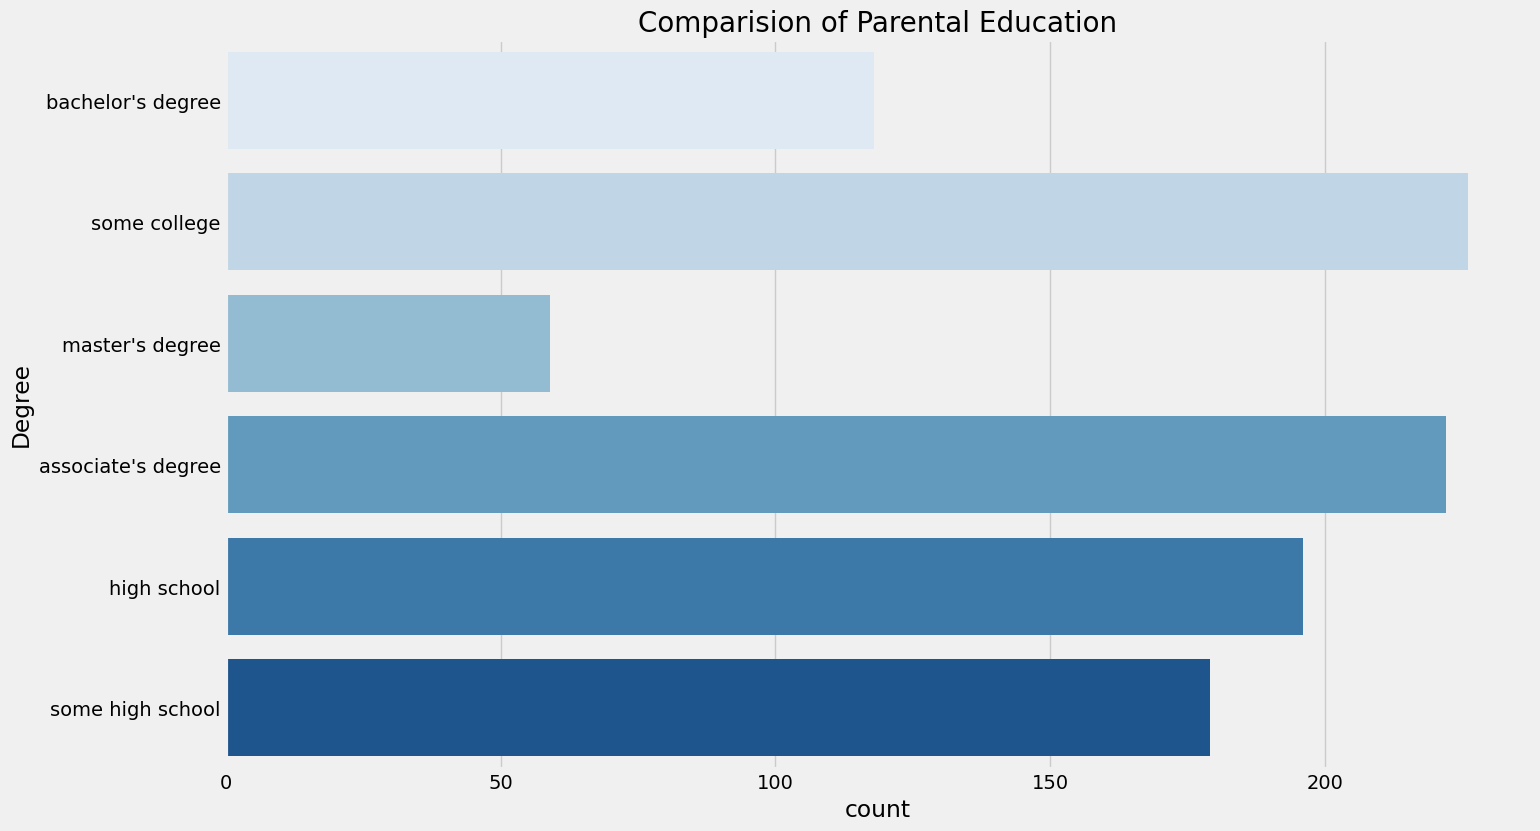

In [29]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette='Blues')
plt.title('Comparision of Parental Education', fontweight =30, fontsize = 20)
plt.ylabel('Degree')
plt.xlabel('count')
plt.show()

#### Insights
<ul>
    <li>Largest number of parents are from some college.</li>
</ul>

#### Bivariate Analysis (Is parental education has any impact on student's performance?)

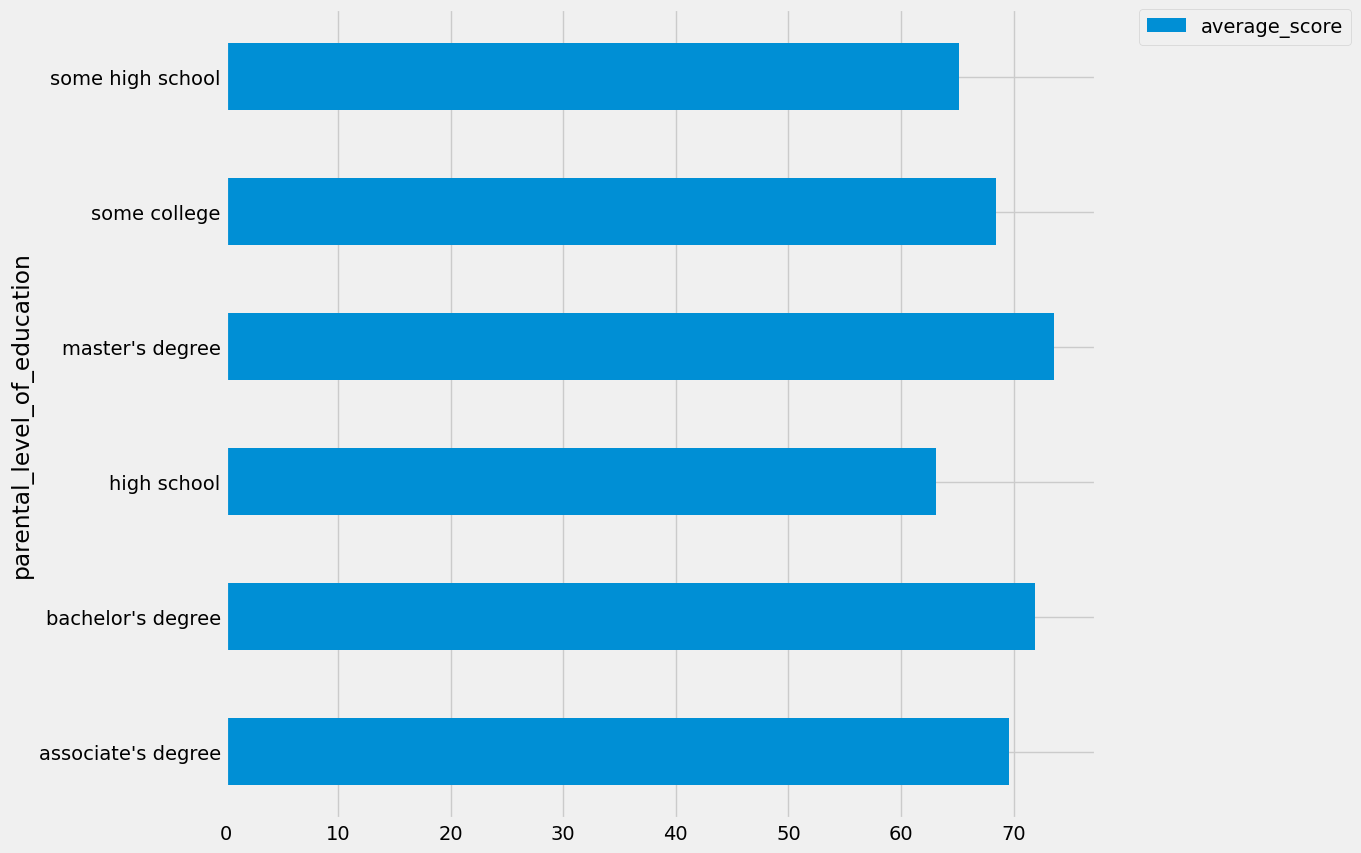

In [30]:
df.groupby('parental_level_of_education')['average_score'].mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0.)
plt.show()

#### Insights
<ul>
    <li>The score of student whose parents possess master and bachelor level education are higher than others.</li>
</ul>

#### 4.4.4 Lunch Column
<ul>
    <li>Which type of lunch is most common amoung students?</li>
    <li>What is the effect of lunch type on test results?</li>
</ul>

##### Univariate Analysis (Which type of lunch is most common among students?)

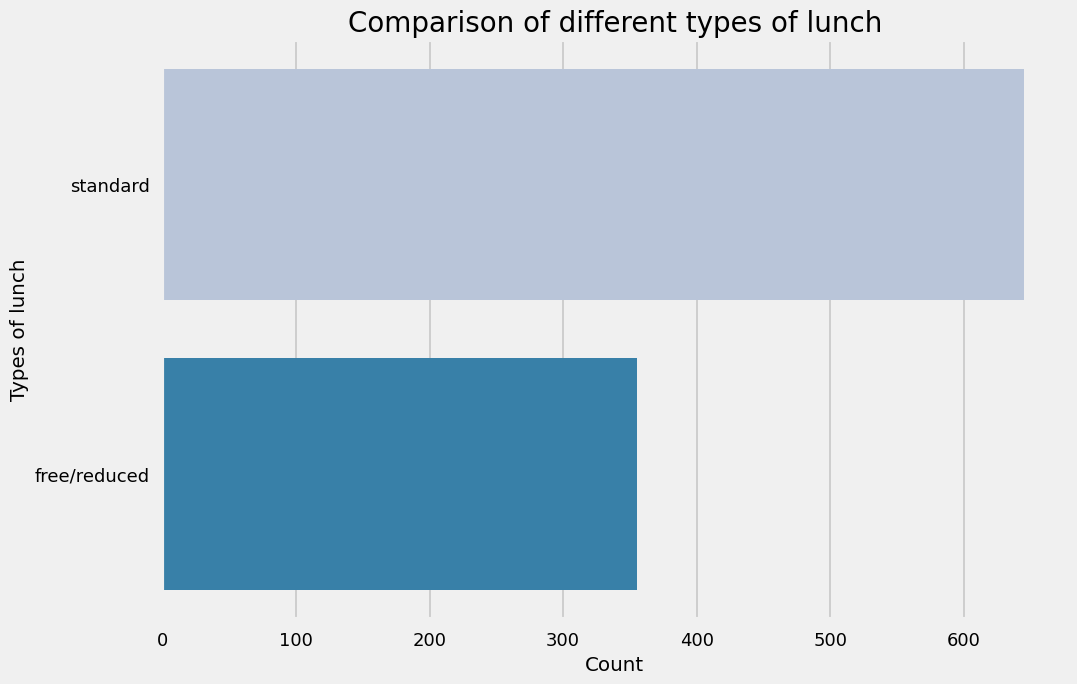

In [31]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('seaborn-v0_8-talk')
sns.countplot(df['lunch'], palette='PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.ylabel('Types of lunch')
plt.xlabel('Count')
plt.show()

#### Insights
<ul>
    <li>Students being served standard lunch was more than free lunch.</li>
</ul>

##### Bivariate Analysis (Is lunch type intake has any impact on student's performance?)

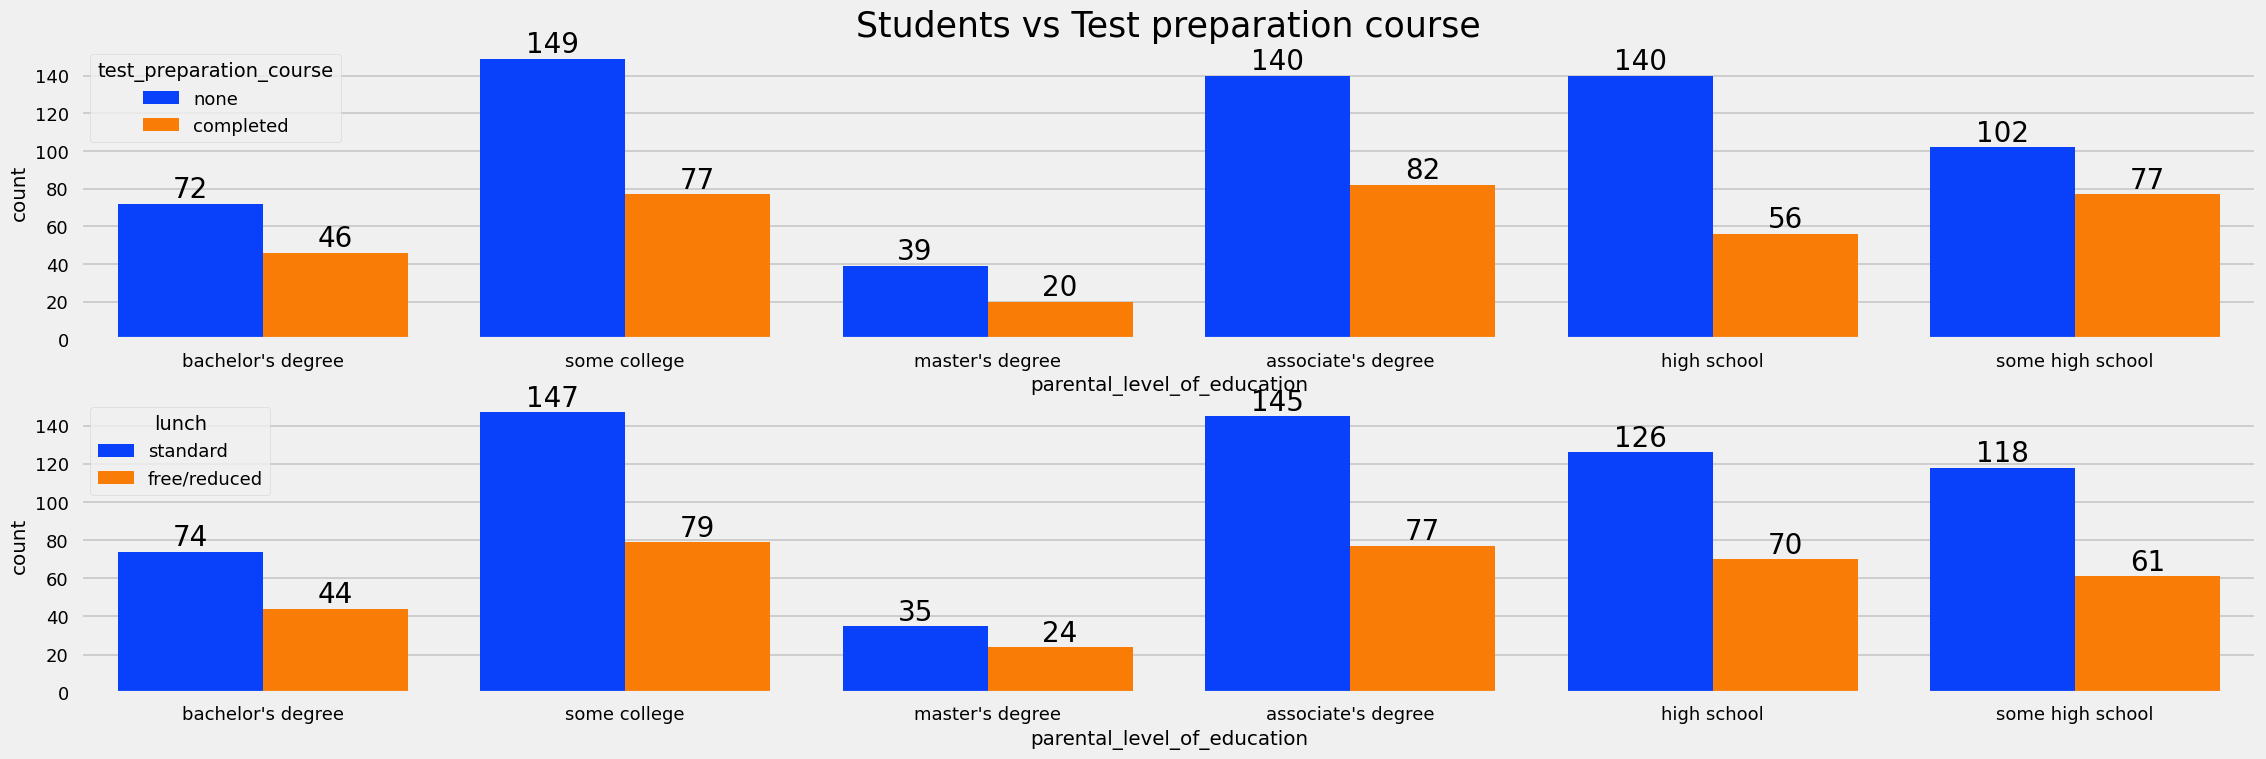

In [32]:
f, ax = plt.subplots(2,1,figsize=(25,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette='bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs Test preparation course', color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

sns.countplot(x=df['parental_level_of_education'],data=df,palette= 'bright', hue='lunch',saturation=0.95,ax = ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

#### Insights
<ul>
    <li>Students who get standard lunch tend to perform better than students who get free/reduced lunch.</li>
</ul>

#### 4.4.5 Test Preparation Course Column
<ul>
    <li>Which type of lunch is most common among students?</li>
    <li>Is test preparation course has any impact on student's performance?</li>
</ul>

<Axes: xlabel='lunch', ylabel='writing_score'>

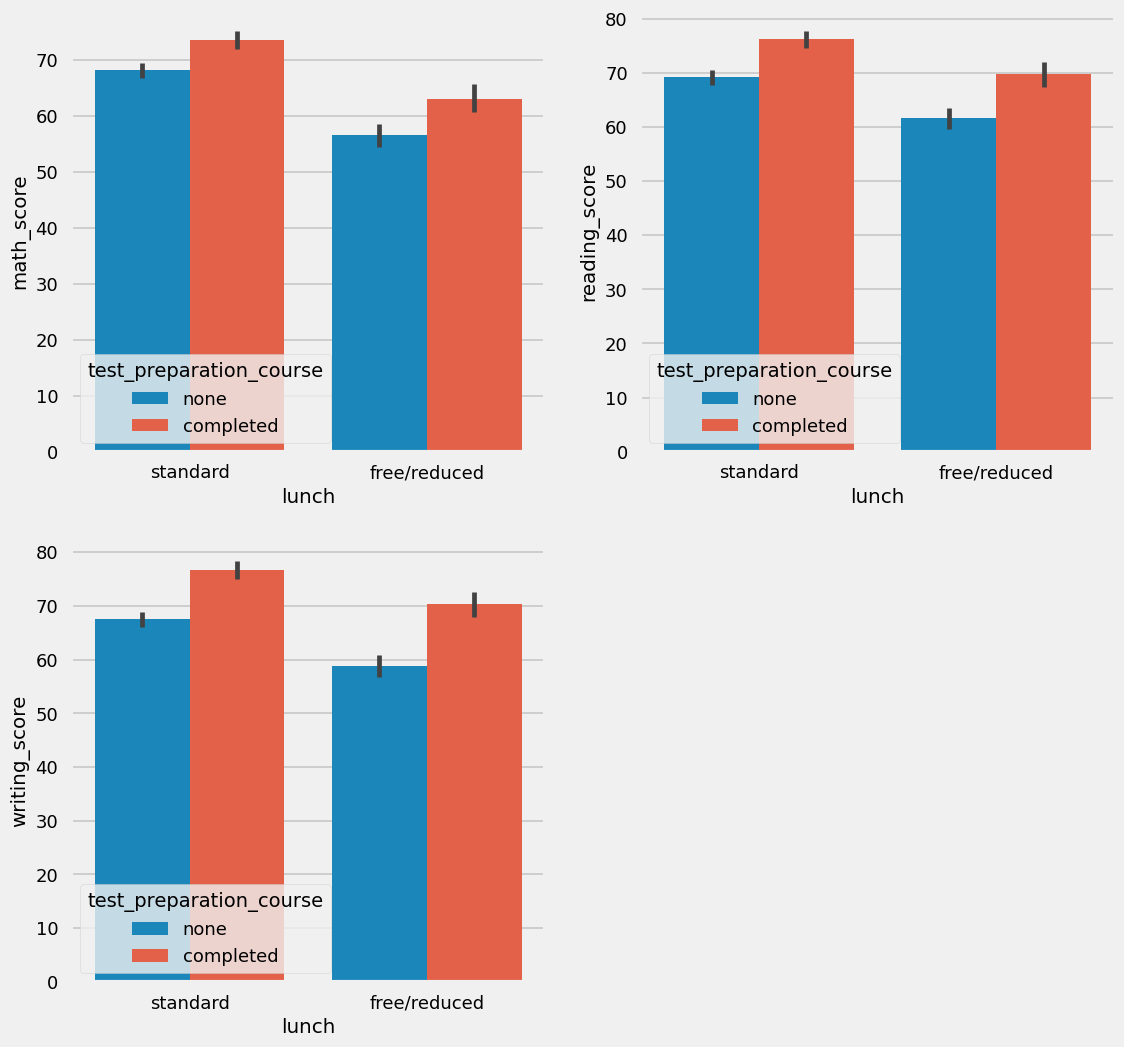

In [33]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])

#### Insights
<ul>
    <li>Students who have completed the test prepration course have scores higher in all three categories than those who haven't taken the coures.</li>
</ul>

#### 4.4.6 Checking Outliers

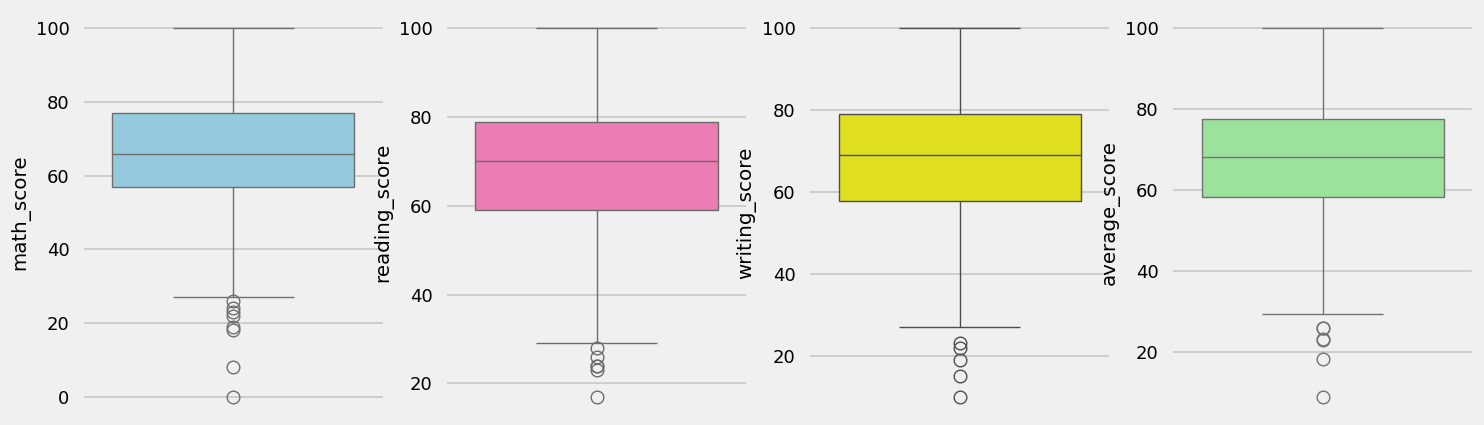

In [34]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()

#### 4.4.7 Multivariate Analysis Using Pairplot

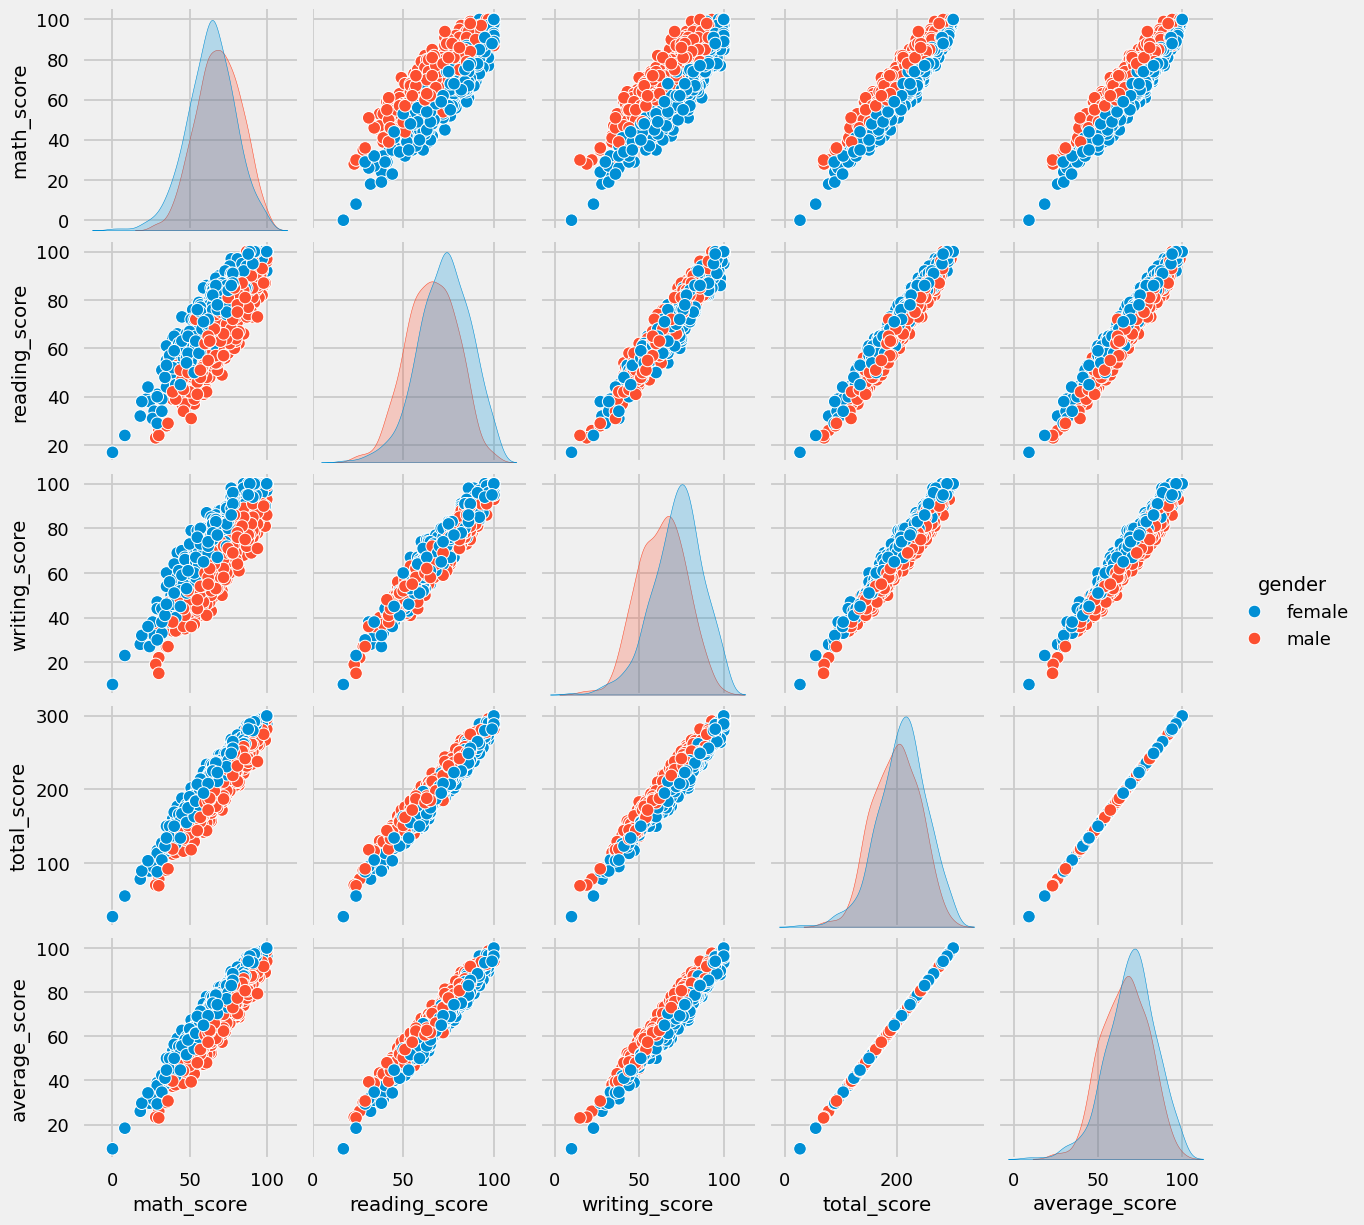

In [35]:
sns.pairplot(df,hue = 'gender')
plt.show()

#### Insights
<ul>
    <li>From the above plot it is clear that all the scores increase linearly with each other.</li>
</ul>

##### 5.Conclusions
<ul>
    <li>Student's Performance is related with lunch, race, parental level education.</li>
    <li>Females lead in pass percentage and also are top-scorers.</li>
    <li>Student's Performance is not much related with test preparation course.</li>
    <li>Finishing preparation course is benefitial.</li>
</ul>